In [16]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X_train = np.array([2.5, 4.7, 5.2, 7.3, 9.5, 11.5])
Y_train = np.array([5.21, 7.7, 8.3, 11, 14.5, 15])

In [31]:
def costFun(w,b,X_train,Y_train):
    m = X_train.shape[0]
    cost = 0
    
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    J = 1 / (2 * m) * cost
    return J

In [35]:
def diffcostFun(w, b,X_train,Y_train): 
    m = X_train.shape[0] 
    diff_w = 0
    diff_b = 0
    
    for i in range(m):
        f_wb = w * X_train[i] + b
        diff_w_i = (f_wb - Y_train[i]) * X_train[i] 
        diff_b_i = f_wb - Y_train[i] 
        diff_b += diff_b_i
        diff_w += diff_w_i 
    diff_w = diff_w / m 
    diff_b = diff_b / m 
    
    return diff_w, diff_b

In [45]:
def fitGD(X_train, Y_train, alpha , n_iters, w_in, b_in, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(n_iters):
        diff_w, diff_b = gradient_function(X_train, Y_train, w , b) 
        
        b = b - alpha * diff_b                            
        w = w - alpha * diff_w  
    
        if i<100000:     
            J_history.append( cost_function(X_train, Y_train, w , b))
            p_history.append([w,b])
 
        if i% math.ceil(n_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"diff_w: {diff_w: 0.3e}, diff_b: {diff_b: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [46]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = fitGD(X_train ,Y_train, w_init, b_init, tmp_alpha, 
                                                    iterations,costFun , diffcostFun)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (  0.0100,10000.0000)


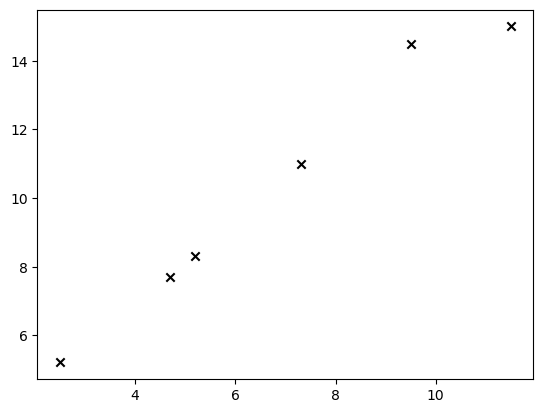

In [78]:
plt.scatter(X_train, Y_train, marker='x', c='black')

In [79]:
def output(X_train, w, b):

    m = X_train.shape[0]
    f = np.zeros(m)
    for i in range(m):
        f[i] = w * X_train[i] + b
        
    return f

In [80]:
tmp_f =output(X_train, w, b)

plt.plot(X_train, tmp_f, c='b',label='Prediction')

plt.scatter(X_train, Y_train, marker='p', c='r',label='Actual Values')

plt.title("x vs y")
plt.ylabel('y value')
plt.xlabel('x value')
plt.legend()
plt.show()

NameError: name 'w' is not defined

In [59]:
X_test = [3.5, 5, 6, 8, 10 ]
for i in range(len(X_test)):
      print(f"for {X_test[i]} gives {w_final*X_test[i] + b_final:0.3f}")

for 3.5 gives 10000.035
for 5 gives 10000.050
for 6 gives 10000.060
for 8 gives 10000.080
for 10 gives 10000.100
